In [16]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import multiprocessing

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Lee_KJ_Kidney_10x_sep19/scanpy'))

results_file = 'out/Lee_Sept_new.h5ad'

adata = sc.read_h5ad(results_file)
adata

AnnData object with n_obs × n_vars = 106531 × 1366 
    obs: 'batch', 'group', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'Park_Endo_score', 'Park_Peri_score', 'Park_Podo_score', 'Park_PCT-S1_score', 'Park_PT-S2_score', 'Park_PST-S3_score', 'Park_DLH_score', 'Park_LOH_score', 'Park_DCT_score', 'Park_CD-IC-A_score', 'Park_CD-IC-B_score', 'Park_CD-Trans_score', 'Park_CD-PC_score', 'Park_Fibro_score', 'Park_Macro_score', 'Park_Neutro_score', 'Park_Bcell_score', 'Park_Tcell_score', 'Park_NKcell_score', 'Park_Novel1_score', 'Park_Novel2_score', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'orig_labels_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X

In [17]:
def exportDEres(adata, filename):
    scores1 = pd.DataFrame(data = adata_x.uns['DE_results']['scores']['Adh5'], index = adata_x.uns['DE_results']['names']['Adh5'])
    lfc1 = pd.DataFrame(data = adata_x.uns['DE_results']['logfoldchanges']['Adh5'], index = adata_x.uns['DE_results']['names']['Adh5'])
    pvals1 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals']['Adh5'], index = adata_x.uns['DE_results']['names']['Adh5'])
    padj1 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals_adj']['Adh5'], index = adata_x.uns['DE_results']['names']['Adh5'])
    dfs1 = [scores1, lfc1, pvals1, padj1]
    df_final1 = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs1)
    df_final1.columns = ['Adh5_scores', 'Adh5_logfoldchanges', 'Adh5_pvals', 'Adh5_pvals_adj']

    scores2 = pd.DataFrame(data = adata_x.uns['DE_results']['scores']['Csb'], index = adata_x.uns['DE_results']['names']['Csb'])
    lfc2 = pd.DataFrame(data = adata_x.uns['DE_results']['logfoldchanges']['Csb'], index = adata_x.uns['DE_results']['names']['Csb'])
    pvals2 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals']['Csb'], index = adata_x.uns['DE_results']['names']['Csb'])
    padj2 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals_adj']['Csb'], index = adata_x.uns['DE_results']['names']['Csb'])
    dfs2 = [scores2, lfc2, pvals2, padj2]
    df_final2 = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs2)
    df_final2.columns = ['Csb_scores', 'Csb_logfoldchanges', 'Csb_pvals', 'Csb_pvals_adj']

    scores3 = pd.DataFrame(data = adata_x.uns['DE_results']['scores']['DKO'], index = adata_x.uns['DE_results']['names']['DKO'])
    lfc3 = pd.DataFrame(data = adata_x.uns['DE_results']['logfoldchanges']['DKO'], index = adata_x.uns['DE_results']['names']['DKO'])
    pvals3 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals']['DKO'], index = adata_x.uns['DE_results']['names']['DKO'])
    padj3 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals_adj']['DKO'], index = adata_x.uns['DE_results']['names']['DKO'])
    dfs3 = [scores3, lfc3, pvals3, padj3]
    df_final3 = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs3)
    df_final3.columns = ['DKO_scores', 'DKO_logfoldchanges', 'DKO_pvals', 'DKO_pvals_adj']

    df = [df_final1, df_final2, df_final3]
    df_final = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), df)
    df_final.to_csv(filename, sep = '\t')  

In [18]:
outpath = 'out/DEG/'
if not os.path.exists(outpath):
        os.makedirs(outpath)

In [19]:
for x in list(set(adata.obs['celltype'])):
    adata_x = adata[adata.obs['celltype'] == x]
    sc.tl.rank_genes_groups(adata_x, groupby='group', key_added='DE_results', method='wilcoxon', groups=['Adh5', 'Csb', 'DKO'], reference='WT', n_genes=30000)
    exportDEres(adata_x, outpath+str(x)+'.txt')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import multiprocessing

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Lee_KJ_Kidney_10x_sep19/scanpy'))

pt_file = 'out/Lee_Sept_new_pt.h5ad'

pt = sc.read_h5ad(pt_file)
pt

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


AnnData object with n_obs × n_vars = 81343 × 894 
    obs: 'batch', 'group', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'Park_Endo_score', 'Park_Peri_score', 'Park_Podo_score', 'Park_PCT-S1_score', 'Park_PT-S2_score', 'Park_PST-S3_score', 'Park_DLH_score', 'Park_LOH_score', 'Park_DCT_score', 'Park_CD-IC-A_score', 'Park_CD-IC-B_score', 'Park_CD-Trans_score', 'Park_CD-PC_score', 'Park_Fibro_score', 'Park_Macro_score', 'Park_Neutro_score', 'Park_Bcell_score', 'Park_Tcell_score', 'Park_NKcell_score', 'Park_Novel1_score', 'Park_Novel2_score', 'celltype', 'leiden_pt', 'pt_celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'dendrogram_leiden_pt', 'group_colors', 'leiden', 'leiden_colors', 'leiden_pt_colors', 'leiden_sizes', 'neighbors', 

In [2]:
sc.tl.rank_genes_groups(pt, groupby='pt_celltype', method='wilcoxon', n_genes=30000)

In [33]:
def exportDEres(adata, column, filename):
    scores = pd.DataFrame(data = adata.uns['rank_genes_groups']['scores'][column], index = adata.uns['rank_genes_groups']['names'][column])
    lfc = pd.DataFrame(data = adata.uns['rank_genes_groups']['logfoldchanges'][column], index = adata.uns['rank_genes_groups']['names'][column])
    pvals = pd.DataFrame(data = adata.uns['rank_genes_groups']['pvals'][column], index = adata.uns['rank_genes_groups']['names'][column])
    padj = pd.DataFrame(data = adata.uns['rank_genes_groups']['pvals_adj'][column], index = adata.uns['rank_genes_groups']['names'][column])
    dfs = [scores, lfc, pvals, padj]
    df_final = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs)
    df_final.columns = ['scores', 'logfoldchanges', 'pvals', 'pvals_adj']

    df_final.to_csv(filename, sep = '\t')  

In [38]:
outpath = 'out/DEG/PT_subset'
if not os.path.exists(outpath):
        os.makedirs(outpath)
exportDEres(pt, 'PT-0', outpath+'PT-0_topmarkers.txt')
exportDEres(pt, 'PT-1', outpath+'PT-1_topmarkers.txt')
exportDEres(pt, 'PT-2', outpath+'PT-2_topmarkers.txt')
exportDEres(pt, 'PT-3', outpath+'PT-3_topmarkers.txt')
exportDEres(pt, 'PT-4-DKO', outpath+'PT-4-DKO_topmarkers.txt')
exportDEres(pt, 'PT-5', outpath+'PT-5_topmarkers.txt')
exportDEres(pt, 'PT-6', outpath+'PT-6_topmarkers.txt')
exportDEres(pt, 'PT-7-Novel1', outpath+'PT-7-Novel1_topmarkers.txt')

In [35]:
scores = pd.DataFrame(pt.uns['rank_genes_groups']['scores'])

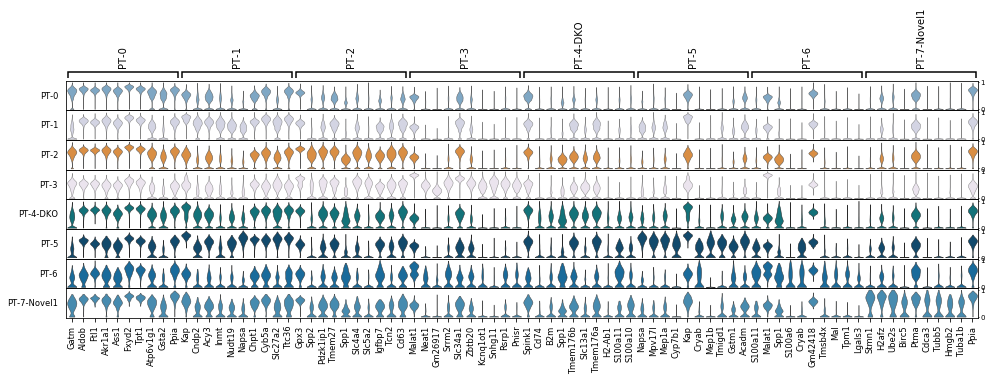

In [3]:
sc.pl.rank_genes_groups_stacked_violin(pt, groupby='pt_celltype', 
                                       n_genes=10, 
                                       dendrogram = False,
                                       standard_scale = 'var',
                                       row_palette = ['#0570b0', '#3690c0', '#74a9cf', '#d0d1e6', '#F28E2b', '#ece2f0', '#02818a', '#034e7b'])

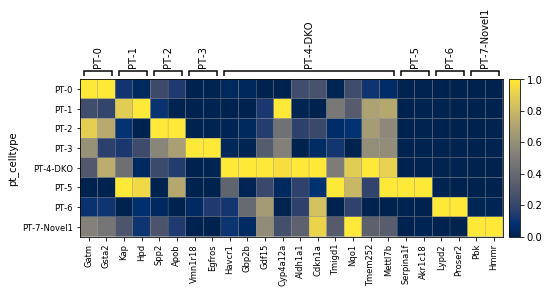

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[7.68, 0, 0.2])

In [21]:
top2 = {'PT-0':['Gatm', 'Gsta2'],
    'PT-1':['Kap', 'Hpd'],
    'PT-2':['Spp2', 'Apob'],
    'PT-3':['Vmn1r18', 'Egfros'],
    'PT-4-DKO':['Havcr1', 'Gbp2b', 'Gdf15', 'Cyp4a12a', 'Aldh1a1', 'Cdkn1a','Tmigd1', 'Nqo1', 'Tmem252', 'Mettl7b'],
    'PT-5':['Serpina1f','Akr1c18'],
    'PT-6':['Lypd2', 'Proser2'],
    'PT-7-Novel1':['Pbk', 'Hmmr']}
sc.pl.matrixplot(pt, top2, groupby='pt_celltype', standard_scale = 'var', cmap = 'cividis')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import multiprocessing

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Lee_KJ_Kidney_10x_sep19/scanpy'))

pt_file = 'out/Lee_Sept_new_pt.h5ad'

pt = sc.read_h5ad(pt_file)
pt

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


AnnData object with n_obs × n_vars = 81343 × 894 
    obs: 'batch', 'group', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'Park_Endo_score', 'Park_Peri_score', 'Park_Podo_score', 'Park_PCT-S1_score', 'Park_PT-S2_score', 'Park_PST-S3_score', 'Park_DLH_score', 'Park_LOH_score', 'Park_DCT_score', 'Park_CD-IC-A_score', 'Park_CD-IC-B_score', 'Park_CD-Trans_score', 'Park_CD-PC_score', 'Park_Fibro_score', 'Park_Macro_score', 'Park_Neutro_score', 'Park_Bcell_score', 'Park_Tcell_score', 'Park_NKcell_score', 'Park_Novel1_score', 'Park_Novel2_score', 'celltype', 'leiden_pt', 'pt_celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'dendrogram_leiden_pt', 'group_colors', 'leiden', 'leiden_colors', 'leiden_pt_colors', 'leiden_sizes', 'neighbors', 

In [2]:
def exportDEres(adata, filename):
    scores1 = pd.DataFrame(data = adata_x.uns['DE_results']['scores']['Adh5'], index = adata_x.uns['DE_results']['names']['Adh5'])
    lfc1 = pd.DataFrame(data = adata_x.uns['DE_results']['logfoldchanges']['Adh5'], index = adata_x.uns['DE_results']['names']['Adh5'])
    pvals1 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals']['Adh5'], index = adata_x.uns['DE_results']['names']['Adh5'])
    padj1 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals_adj']['Adh5'], index = adata_x.uns['DE_results']['names']['Adh5'])
    dfs1 = [scores1, lfc1, pvals1, padj1]
    df_final1 = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs1)
    df_final1.columns = ['Adh5_scores', 'Adh5_logfoldchanges', 'Adh5_pvals', 'Adh5_pvals_adj']

    scores2 = pd.DataFrame(data = adata_x.uns['DE_results']['scores']['Csb'], index = adata_x.uns['DE_results']['names']['Csb'])
    lfc2 = pd.DataFrame(data = adata_x.uns['DE_results']['logfoldchanges']['Csb'], index = adata_x.uns['DE_results']['names']['Csb'])
    pvals2 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals']['Csb'], index = adata_x.uns['DE_results']['names']['Csb'])
    padj2 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals_adj']['Csb'], index = adata_x.uns['DE_results']['names']['Csb'])
    dfs2 = [scores2, lfc2, pvals2, padj2]
    df_final2 = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs2)
    df_final2.columns = ['Csb_scores', 'Csb_logfoldchanges', 'Csb_pvals', 'Csb_pvals_adj']

    scores3 = pd.DataFrame(data = adata_x.uns['DE_results']['scores']['DKO'], index = adata_x.uns['DE_results']['names']['DKO'])
    lfc3 = pd.DataFrame(data = adata_x.uns['DE_results']['logfoldchanges']['DKO'], index = adata_x.uns['DE_results']['names']['DKO'])
    pvals3 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals']['DKO'], index = adata_x.uns['DE_results']['names']['DKO'])
    padj3 = pd.DataFrame(data = adata_x.uns['DE_results']['pvals_adj']['DKO'], index = adata_x.uns['DE_results']['names']['DKO'])
    dfs3 = [scores3, lfc3, pvals3, padj3]
    df_final3 = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs3)
    df_final3.columns = ['DKO_scores', 'DKO_logfoldchanges', 'DKO_pvals', 'DKO_pvals_adj']

    df = [df_final1, df_final2, df_final3]
    df_final = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), df)
    df_final.to_csv(filename, sep = '\t')  

In [3]:
outpath = 'out/DEG/'
if not os.path.exists(outpath):
        os.makedirs(outpath)

In [5]:
for x in list(set(pt.obs['pt_celltype'])):
    adata_x = pt[pt.obs['pt_celltype'] == x]
    sc.tl.rank_genes_groups(adata_x, groupby='group', key_added='DE_results', method='wilcoxon', groups=['Adh5', 'Csb', 'DKO'], reference='WT', n_genes=30000)
    exportDEres(adata_x, outpath+str(x)+'.txt')

In [10]:
geneLengthTest = {'shortest':["Nron","Igkc","Npb","Proscos","Sct","Tescl","Oxt","Mif","Bglap","Rbakdn","Bmyc","Rprml","Apcs","Npff","Npw","Mymx","Tcap","Tbcc","Fcor","Msmp"],
'longest':["Sgcz","Fhit","Lsamp","Dmd","Ptprd","Narfl","Diexf","Zufsp","Fuk","Nespas","Mdrl","Micalcl","Nov","Ikbkap","Ctgf","Ispd","Hrasls","Lppos","Mut","Aes"]}

In [11]:
results_file = 'out/Lee_Sept_new.h5ad'
adata = sc.read_h5ad(results_file)
adata

AnnData object with n_obs × n_vars = 106531 × 1366 
    obs: 'batch', 'group', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'Park_Endo_score', 'Park_Peri_score', 'Park_Podo_score', 'Park_PCT-S1_score', 'Park_PT-S2_score', 'Park_PST-S3_score', 'Park_DLH_score', 'Park_LOH_score', 'Park_DCT_score', 'Park_CD-IC-A_score', 'Park_CD-IC-B_score', 'Park_CD-Trans_score', 'Park_CD-PC_score', 'Park_Fibro_score', 'Park_Macro_score', 'Park_Neutro_score', 'Park_Bcell_score', 'Park_Tcell_score', 'Park_NKcell_score', 'Park_Novel1_score', 'Park_Novel2_score', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'dendrogram_celltype', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'orig_labels_colors', 'paga', 'pca', 'rank_genes_groups', 'sample_colo

In [14]:
mct = dict(zip(list(set(adata.obs['celltype'])), ['MNP','Basophil','Endothelial','CD-IC','DCT','B','Myofibroblast','Erythrocyte','CT','PT','CD-PC','T_NK','PT','pDC','LOH','Podocyte','Neutrophil','PT']))
adata.obs['main_celltype'] = [mct[c] for c in adata.obs['celltype']]

In [15]:
adata = adata[adata.obs['main_celltype'] == 'PT']

Trying to set attribute `.obs` of view, making a copy.
... storing 'main_celltype' as categorical


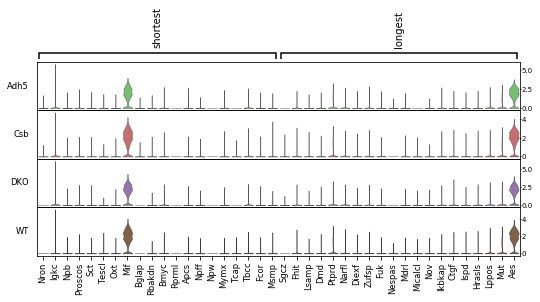

In [16]:
sc.pl.stacked_violin(adata, geneLengthTest, groupby = 'group')

In [17]:
pt4_dko = pt[pt.obs['pt_celltype'] == 'PT-4-DKO']

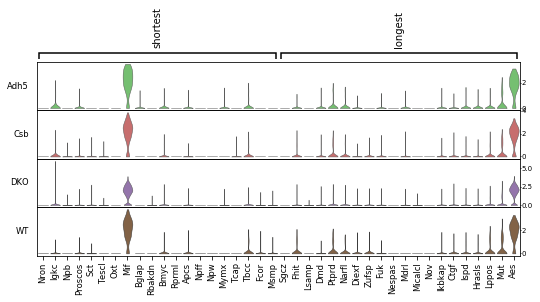

In [18]:
sc.pl.stacked_violin(pt4_dko, geneLengthTest, groupby = 'group')